In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('titanic_toy.csv')

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
df.shape

(891, 4)

In [10]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [11]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape

(712, 3)

In [13]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
mean_age= X_train['Age'].mean()
median_age= X_train['Age'].median()

mean_fare= X_train['Fare'].mean()
median_fare= X_train['Fare'].median()

In [18]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)
X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)


In [19]:
X_train.head()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [20]:
print('original age variance: ',X_train['Age'].var())
print('mean age variance: ',X_train['Age_mean'].var())
print('median age variance: ',X_train['Age_median'].var())

print('original fare variance: ',X_train['Fare'].var())
print('mean fare variance: ',X_train['Fare_mean'].var())
print('median fare variance: ',X_train['Fare_median'].var())

original age variance:  204.3495133904614
mean age variance:  161.81262452718673
median age variance:  161.9895663346054
original fare variance:  2448.197913706318
mean fare variance:  2324.2385256705547
median fare variance:  2340.0910219753637


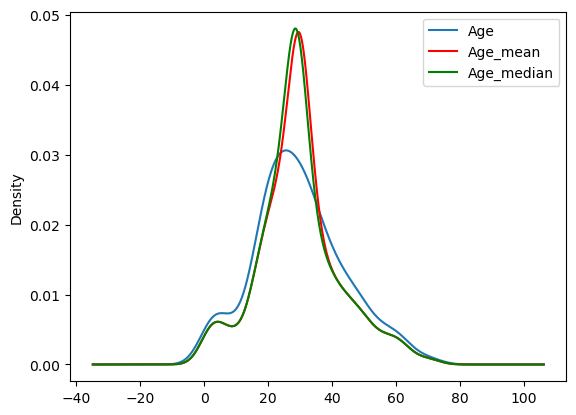

In [28]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

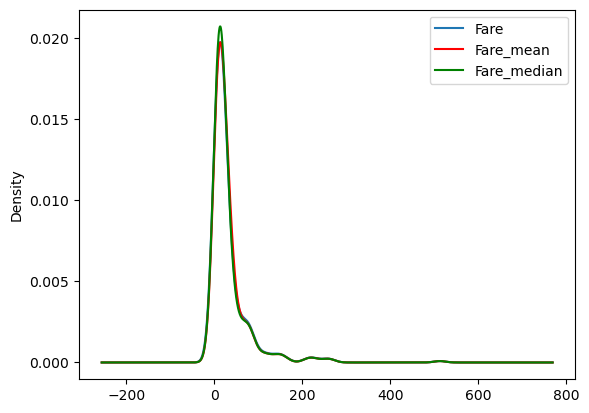

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [29]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


<Axes: >

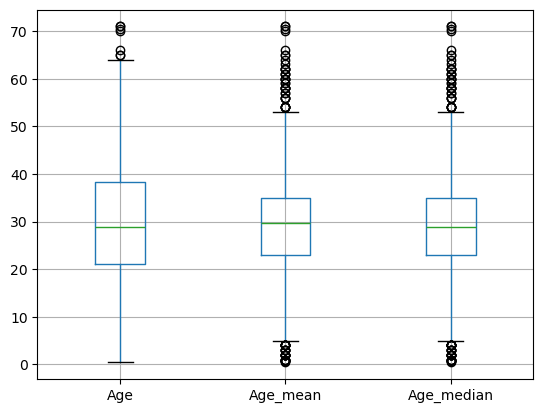

In [30]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

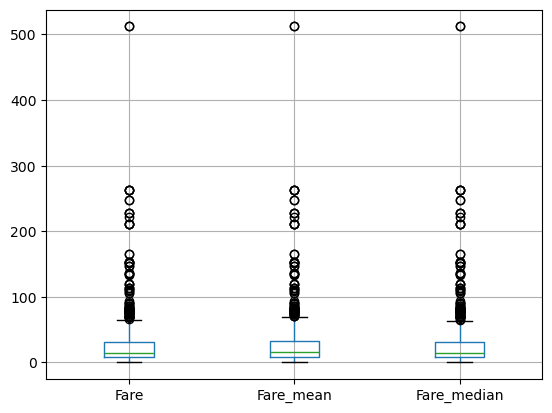

In [31]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

## using sklearn

In [32]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],
    remainder='passthrough')

In [35]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [37]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [38]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [40]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)